In [7]:
import matplotlib.pyplot as plt
from csv import DictReader
import numpy as np
from datetime import datetime


podatki = []
dtype = [
    ('Date', 'U10'),
    ('Time', 'U10'),
    ('Location', 'U100'),
    ('Operator', 'U100'),
    ('Flight', 'U100'),
    ('Route', 'U100'),
    ('Type', 'U100'),
    ('Registration', 'U100'),
    ('cn_In', 'U100'),
    ('Aboard', np.int32),
    ('Fatalities', np.int32),
    ('Ground', np.int32),
    ('Summary', 'U1000')
]

with open("podatki\Airplane_Crashes_and_Fatalities_Since_1908.csv", 'r', encoding='utf-8') as file:
    csv_reader = DictReader(file)
    for row in csv_reader:
        date_str = row['Date']
        date_obj = datetime.strptime(date_str, '%m/%d/%Y')
        date_fixed = date_obj.strftime('%Y-%m-%d')
        
        time = row['Time']
        location = row['Location']
        operator = row['Operator']
        flightNr = row['Flight #']
        route = row['Route']
        type = row['Type']
        registration = row['Registration']
        CnIn = row['cn/In']
        aboard = int(row["Aboard"]) if row["Aboard"] else 0
        fatalities = int(row["Fatalities"]) if row["Fatalities"] else 0
        ground = int(row['Ground']) if row["Ground"] else 0
        summary = row['Summary']
        podatki.append((date_fixed, time, location, operator, flightNr, route, type, registration, CnIn, aboard, fatalities, ground, summary))



In [2]:
#Katera leta so bila najbolj nesrečna za potnike letalskega prometa

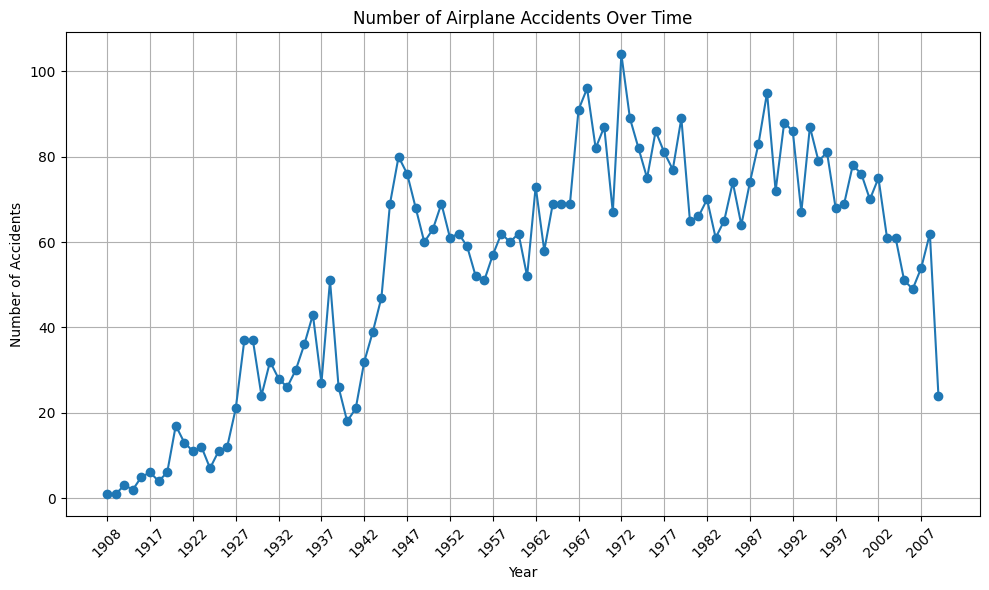

In [3]:
podatki = np.sort(np.array(podatki, dtype=dtype), order='Date')

years = np.array([crash[0][:4] for crash in podatki])
unique_years, crash_counts = np.unique(years, return_counts=True)

sorted_indices = np.argsort(unique_years)
unique_years_sorted = unique_years[sorted_indices]
crash_counts_sorted = crash_counts[sorted_indices]



years = np.unique([entry['Date'][:4] for entry in podatki])
num_accidents = [np.sum([1 for entry in podatki if entry['Date'].startswith(year)]) for year in years]

plt.figure(figsize=(10, 6))
plt.plot(years, num_accidents, marker='o', linestyle='-')
plt.title('Number of Airplane Accidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(years[::5], rotation=45)  # Show ticks for every 5th year, adjust as needed
plt.tight_layout()
plt.show()


# Prve ugotovitve:
- Nazačetku manj nesreč saj se je letalska industrija še razvijala
- Velik porast nesreč v 2. svetovni vojni

In [4]:
# Extract registration numbers of airplanes
registrations = np.array([crash[6] for crash in podatki])  # Assuming the registration number is at index 7

# Get unique registration numbers and their counts
unique_registrations, counts = np.unique(registrations, return_counts=True)

# Sort by counts in descending order to get the top 10 airplanes with highest crash counts
sorted_indices = np.argsort(counts)[::-1]  # Sort indices in descending order
top_10_indices = sorted_indices[:10]  # Get the indices of the top 10 airplanes
top_10_airplanes = unique_registrations[top_10_indices]  # Get the registration numbers of the top 10 airplanes

print(top_10_airplanes)

# Print top 10 airplanes with highest crash counts

top_10_dict = {}

for airplane in top_10_airplanes:
    count = counts[np.where(unique_registrations == airplane)[0][0]]  # Get count for the current airplane
    print(airplane, ":", count)
    top_10_dict[airplane] = count
    # Save to dict

airplanes = list(top_10_dict.keys())
crash_counts = list(top_10_dict.values())

['Douglas DC-3' 'de Havilland Canada DHC-6 Twin Otter 300' 'Douglas C-47A'
 'Douglas C-47' 'Douglas DC-4' 'Yakovlev YAK-40' 'Antonov AN-26'
 'Junkers JU-52/3m' 'Douglas C-47B' 'De Havilland DH-4']
Douglas DC-3 : 334
de Havilland Canada DHC-6 Twin Otter 300 : 81
Douglas C-47A : 74
Douglas C-47 : 62
Douglas DC-4 : 40
Yakovlev YAK-40 : 37
Antonov AN-26 : 36
Junkers JU-52/3m : 32
Douglas C-47B : 29
De Havilland DH-4 : 28


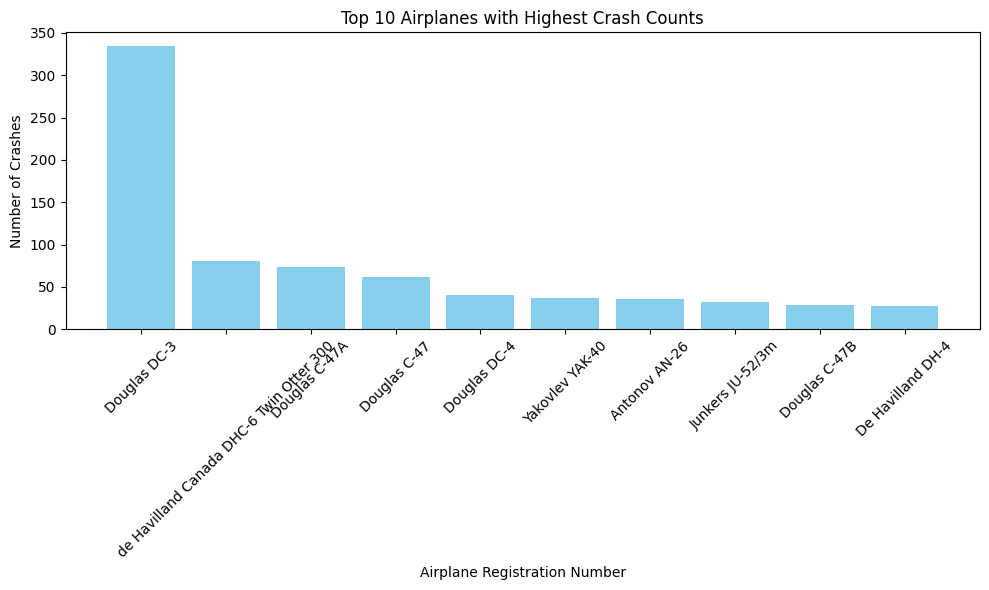

In [5]:
plt.figure(figsize=(10, 6))
plt.bar(airplanes, crash_counts, color='skyblue')
plt.title('Top 10 Airplanes with Highest Crash Counts')
plt.xlabel('Airplane Registration Number')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Display Name: North Fort Myer Drive, Rosslyn, Arlington, Arlington County, Virginia, 22209, United States
Latitude: 38.8985136
Longitude: -77.0724488
No results found
Display Name: Victoria, Capital Regional District, British Columbia, Canada
Latitude: 48.4283182
Longitude: -123.364953
No results found
No results found
Display Name: Tienen, Leuven, Vlaams-Brabant, Vlaanderen, 3300, België / Belgique / Belgien
Latitude: 50.8074825
Longitude: 4.9371775
No results found
No results found
Display Name: Billericay, Basildon, Essex, England, United Kingdom
Latitude: 51.6284395
Longitude: 0.4218142
Display Name: Potters Bar, Hertsmere, Hertfordshire, England, EN6 1QG, United Kingdom
Latitude: 51.6958889
Longitude: -0.1848935
Display Name: Mainz, Rheinland-Pfalz, Deutschland
Latitude: 50.0012314
Longitude: 8.2762513
Display Name: Hart Lane Off License, Hart Lane, Grange, Hartlepool, Tees Valley, England, TS26 8NL, United Kingdom
Latitude: 54.6910151
Longitude: -1.2335364
No results found
No res

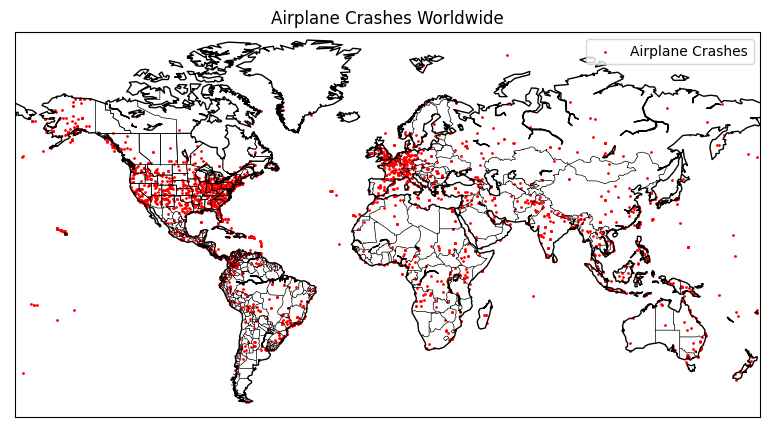

In [35]:
# ZEMLJEVID SVETA - Pridobivanje koordinat in shranjevanje v .csv datoteko
# !! PROGRAM TEČE OKOLI 3 URE !! PODATKI SO ŽE V CSV DATOTEKI !!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import time
import requests

base_url = "https://nominatim.openstreetmap.org/search.php"
lokacije = np.array([crash[2] for crash in podatki])
koordinate = []
for lokacija in lokacije:
    time.sleep(2)
    params = {
        'q': lokacija,
        'format': 'json'
    }
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        data = response.json()
        if data:
            print("Display Name:", data[0]['display_name'])
            print("Latitude:", data[0]['lat'])
            print("Longitude:", data[0]['lon'])
            koordinate.append(data[0])
        else:
            print("No results found")

    else:
        print("Failed to fetch data")

crash_data = pd.DataFrame({
    'Location Name': [koordinata['display_name'] for koordinata in koordinate],
    'Latitude': [float(koordinata['lat']) for koordinata in koordinate],
    'Longitude': [float(koordinata['lon']) for koordinata in koordinate]
})
# Shrani DataFrame v .csv datoteko
crash_data.to_csv('podatki/koordinate.csv', index=False)

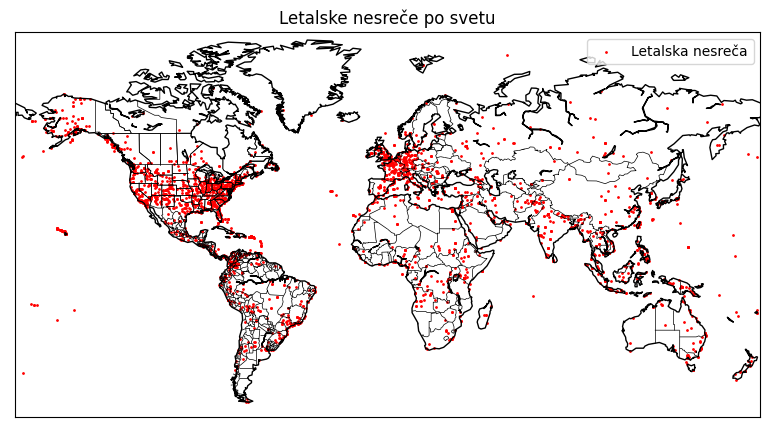

In [38]:
# ZEMLJEVID SVETA - branje podatkov iz podatki/koordinate.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

koordinate = []
dtype = [
    ('Location Name', 'U1000'),
    ('Latitude', np.float32),
    ('Longitude', np.float32),
]
with open("podatki\koordinate.csv", 'r', encoding='utf-8') as file:
    csv_reader = DictReader(file)
    for row in csv_reader:
        location = row['Location Name']
        latitude = float(row["Latitude"]) if row["Latitude"] else 0.0
        longitude = float(row["Longitude"]) if row["Longitude"] else 0.0
        koordinate.append((location, latitude, longitude))

crash_data = pd.DataFrame({
    'Location Name': [koordinata[0] for koordinata in koordinate],
    'Latitude': [float(koordinata[1]) for koordinata in koordinate],
    'Longitude': [float(koordinata[2]) for koordinata in koordinate]
})

# Ustvari Basemap objekt
plt.figure(figsize=(10, 5))
m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=85,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.drawstates()
# Označi vsa strmoglavljenja z rdečo piko
x, y = m(crash_data['Longitude'].values, crash_data['Latitude'].values)
m.scatter(x, y, color='red', marker='o', label='Letalska nesreča', s=1)
plt.legend()
plt.title('Letalske nesreče po svetu')
plt.show()